In [1]:
import os
import pandas as pd
import glob
import numpy as np

from itertools import combinations

import networkx as nx
from networkx.algorithms import community

import matplotlib.pyplot as plt

### Data pre-processing

In [4]:
glob.os.listdir()

['test.ipynb']

### This is a test only for 08.09.2018

In [23]:
file = "../Data/premier_league_2018-08-09.csv"
data_b = pd.read_csv(file)
data_b.head()

,Tweet_url,Datetime,Text,Tweet Id,Username,User_id,Description,Display_name,Verified,Created_at,...,Quote_count,Lang,Source_label,inReplyToTweetId,conversationId,Media,Coordinates,Place,Hashtags,Cashtags
0,https://twitter.com/AfifMrFive/status/10277060...,2018-08-09 23:59:59+00:00,Man Utd sengaja tdk memberikan kejutan transfe...,1027706086210469888,AfifMrFive,472843316,In the Name of Coffee,T.E.M.P.E,False,2012-01-24 10:56:02+00:00,...,0,in,Twitter for Android,NaN,1027706086210469888,NaN,NaN,NaN,NaN,NaN
1,https://twitter.com/ManoDLC/status/10277060680...,2018-08-09 23:59:55+00:00,#EsporteInterativo vai deixar saudades ❤️ Tris...,1027706068082876417,ManoDLC,730459959205502977,Flamengo até morrer eu sou! ❤️🖤,𝙊 𝙏𝙝𝙪𝙪𝙧 ᶜʳᶠ,False,2016-05-11 18:10:00+00:00,...,0,pt,Twitter for Android,NaN,1027706068082876417,NaN,NaN,NaN,['EsporteInterativo'],NaN
2,https://twitter.com/rumbonuevo/status/10277060...,2018-08-09 23:59:54+00:00,Inauguran Premier League 2018 - https://t.co/7...,1027706064295342080,rumbonuevo,125835134,"Rumbo Nuevo, El Diario de la Vida Tabasqueña, ...",Rumbo Nuevo,False,2010-03-24 01:08:02+00:00,...,0,it,app socialautopost,NaN,1027706064295342080,[Photo(previewUrl='https://pbs.twimg.com/media...,NaN,NaN,NaN,NaN
3,https://twitter.com/sportimba/status/102770606...,2018-08-09 23:59:53+00:00,Descripción gráfica de los fichajes en la #Pre...,1027706063032860672,sportimba,860314246177062912,Somos el primer portal peruano exclusivo y esp...,Sportimba.com,False,2017-05-05 02:04:35+00:00,...,0,es,Twitter for Android,NaN,1027706063032860672,[Photo(previewUrl='https://pbs.twimg.com/media...,NaN,NaN,['PremierLeague'],NaN
4,https://twitter.com/stommx/status/102770602848...,2018-08-09 23:59:45+00:00,I liked a @YouTube video https://t.co/WTIRoTzQ...,1027706028488454146,stommx,346876874,NaN,SteveW,False,2011-08-01 23:51:07+00:00,...,0,en,Google,NaN,1027706028488454146,NaN,NaN,NaN,NaN,NaN


In [99]:
data_b[data_b["Tweet Id"] == 1027705638401523714]

,Tweet_url,Datetime,Text,Tweet Id,Username,User_id,Description,Display_name,Verified,Created_at,...,Quote_count,Lang,Source_label,inReplyToTweetId,conversationId,Media,Coordinates,Place,Hashtags,Cashtags
28,https://twitter.com/FFPundits/status/102770563...,2018-08-09 23:58:12+00:00,©️ THE #FPL CAPTAINS POLL ©️\n\nFantasy Premie...,1027705638401523714,FFPundits,470018406,"Providing #FPL tips, news & insight for the 20...",Fantasy Football Pundits,False,2012-01-21 07:25:51+00:00,...,0,en,Twitter for iPhone,NaN,1027705638401523714,NaN,NaN,NaN,['FPL'],NaN


In [84]:
data = pd.read_csv("../Data/conversations_2018-08-09.csv")
data = data.drop(columns = "conv_indx")

In [94]:
data.head()

,conversation_id,tweetId,content,userId
0,1027705841808551936,1027705841808551936,The @premierleague is back tomorrow 😍😍😍,466107707
1,1027705638401523714,1027705638401523714,©️ THE #FPL CAPTAINS POLL ©️\n\nFantasy Premie...,470018406
2,1027705638401523714,1027804676241145856,@FPL_OWLBEAR @FFPundits If I was brave enough ...,860951831777771520
3,1027705638401523714,1027709014619172866,@FFPundits Any tips? https://t.co/VJz1wRpDbO,922075763507122176
4,1027705638401523714,1027805006274224128,@MarkyHHugget @FFPundits Cedric is probably 50...,860951831777771520


In [115]:
# selecting conversations that would create an edge
res = data[data.duplicated(subset=["conversation_id"], keep =False)]

In [119]:
df_links = (res.groupby(['conversation_id'])['userId'].apply(lambda x: pd.DataFrame(list(combinations(x,2))))
      .reset_index(level=1, drop=True)
      .reset_index())

In [120]:
df_links.head()

,conversation_id,0,1
0,1027275106458976256,299263920,1027461210353135616
1,1027275106458976256,299263920,364852345
2,1027275106458976256,299263920,948683826313809925
3,1027275106458976256,299263920,865239626163859456
4,1027275106458976256,299263920,1027461210353135616


In [126]:
df_links.rename(columns={0:'from',1:'to'}, inplace = True)
df_edges= df_links.astype({'from':str, 'to':str}, copy= True)
df_edges

count_df = df_edges.groupby(['from', 'to']).size().reset_index(name='weight')

In [160]:
count_df.to_csv("graph1_08_09.csv")

In [128]:
G = nx.from_pandas_edgelist(count_df, source='from', target='to',edge_attr=True, create_using=nx.DiGraph)

### Network descriptive analysis

In [141]:
# helper functions from the lab 
def net_prop_dict(G):
    prop_dict = {}

    prop_dict['no_of_nodes'] = nx.number_of_nodes(G)
    prop_dict['no_of_edges'] = nx.number_of_edges(G)
    if nx.is_connected(G):
        prop_dict['average_shortest_path_length'] = nx.average_shortest_path_length(G)
        prop_dict['diameter'] = nx.diameter(G)
    prop_dict['transitivity'] = nx.transitivity(G)
    prop_dict['average_clustering'] = nx.average_clustering(G)   
    prop_dict['edge_density'] = nx.classes.function.density(G)
    prop_dict['average_degree'] = np.array([d for n, d in G.degree()]).sum()/nx.number_of_nodes(G)
    prop_dict['total_triangles'] = np.array(list(nx.triangles(G).values())).sum()
    prop_dict['number_connected_components'] = nx.algorithms.components.number_connected_components(G)
    return prop_dict

def net_prop_dict_whole(G, k):
    prop_dict = {}

    prop_dict['no_of_nodes'] = nx.number_of_nodes(G)
    prop_dict['no_of_edges'] = nx.number_of_edges(G)
    if nx.is_connected(G):
        prop_dict['average_shortest_path_length'] = nx.average_shortest_path_length(G)
        prop_dict['diameter'] = nx.diameter(G)
    prop_dict['transitivity'] = nx.transitivity(G)
    prop_dict['average_clustering'] = nx.average_clustering(G)   
    prop_dict['edge_density'] = nx.classes.function.density(G)
    prop_dict['average_degree'] = np.array([d for n, d in G.degree()]).sum()/nx.number_of_nodes(G)
    prop_dict['total_triangles'] = np.array(list(nx.triangles(G).values())).sum()
    prop_dict['number_connected_components'] = nx.algorithms.components.number_connected_components(G)
    prop_dict['giant_component_prop'] = net_prop_dict(G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0]))
    prop_dict['k_core_prop'] = net_prop_dict(nx.k_core(G))
    return prop_dict

In [ ]:
# takes a lof time 
net_prop_dict_whole(G, 3)

(array([7.66e+03, 1.60e+03, 7.00e+02, 8.10e+02, 2.47e+02, 3.50e+01,
        8.00e+00, 2.00e+00, 1.00e+00, 3.00e+00]),
 array([  1. ,  48.4,  95.8, 143.2, 190.6, 238. , 285.4, 332.8, 380.2,
        427.6, 475. ]),
 <a list of 10 Patch objects>)

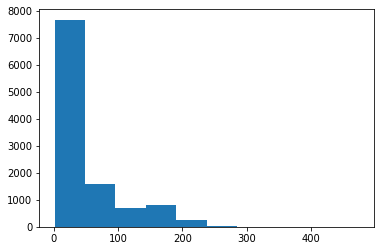

In [139]:
# degree histogram
degrees = [G.degree(n) for n in G.nodes()]
plt.hist(degrees)

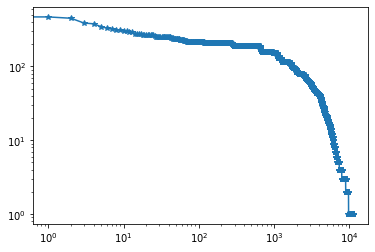

In [143]:
# degree distribution log-log
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
plt.loglog(degree_sequence,marker='*')
plt.show()

In [156]:
# centrality 
eigen_cent = nx.eigenvector_centrality(G)

#pagerank_cent = nx.pagerank(G)
#betweenness = nx.betweenbness_centrality(G)

{'1000024073454272512': 1.1433542444125449e-05,
 '1001843058810466304': 1.1379355186969392e-05,
 '1007729171831906304': 1.1433542444125449e-05,
 '1009723483': 1.1433542444125449e-05,
 '1015891666002161664': 1.1433542444125449e-05,
 '104441419': 1.1379355186969392e-05,
 '1060062397': 0.0004150459467725852,
 '1074052945': 1.1608465487086793e-05,
 '1466675600': 1.1379355186969394e-05,
 '149124369': 1.1379355186969394e-05,
 '1498213327': 1.1379355186969394e-05,
 '1581635803': 1.1379355186969394e-05,
 '159779937': 1.1433801749856635e-05,
 '1692102085': 1.1379355186969394e-05,
 '216861697': 1.1379355186969394e-05,
 '233320761': 1.1433542444125449e-05,
 '2368548347': 1.2104099568473063e-05,
 '262068236': 1.1382040677146749e-05,
 '2752601': 1.1379355186969394e-05,
 '2777278792': 2.069717658212658e-05,
 '2986562914': 1.6568139140144252e-05,
 '3007371935': 1.1379355186969394e-05,
 '3108708625': 1.1379355186969394e-05,
 '3111702545': 1.1379355186969394e-05,
 '3251245417': 1.1433542444125449e-05,


In [158]:
pagerank_cent = nx.pagerank(G)

In [159]:
print("eigen:")
for i in sorted(eigen_cent.items(), key=lambda item: item[1], reverse=True)[:3]:
  print(i)

#print("--")
print("pagerank:")
for i in sorted(pagerank_cent.items(), key=lambda item: item[1], reverse=True)[:3]:
  print(i)

#print("--")
# print("betweenness")
# for i in sorted(betweenness.items(), key=lambda item: item[1], reverse=True)[:3]:
#   print(i)

eigen:
('2987868107', 0.06985349684966168)
('2955389859', 0.06960752703955658)
('4870741240', 0.06914188412174209)
pagerank:
('4604001507', 0.0015631443172323491)
('2665988107', 0.001340544347697076)
('41224886', 0.001077410164717)


In [144]:
degree_centrality = nx.degree_centrality(G) # outputs id: degree of centrality
#nodes[nodes["id"].isin([idx for (idx, val) in sorted(degree_centrality.items(), key=lambda item: item[1], reverse = True)[:4]])]["Name"]

In [145]:
sorted(degree_centrality.items(), key=lambda item: item[1], reverse = True)[:5] # user-ids which have more de

[('3099075032', 0.04292815183009489),
 ('973077014633730048', 0.04229552643470402),
 ('108568373', 0.040578400361500226),
 ('1561123663', 0.03488477180298238),
 ('2987868107', 0.034161771351107095)]

In [154]:
# community algorithms 
import community.community_louvain as community_louvain
import numpy as np

lst_m = community_louvain.best_partition(G)
np.unique(list(lst_m.values())) # number of communities

array([   0,    1,    2, ..., 1633, 1634, 1635])

In [ ]:
data[]

In [ ]:
# impossible to run 
os = nx.spring_layout(G)
partition = lst_m 
import matplotlib.cm as cm

# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()